In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
plt.rcParams['figure.figsize'] = [12, 6]

In [3]:
df = pd.read_csv("train_NIR5Yl1.csv")
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
df.shape

(330045, 7)

In [5]:
df.dtypes

ID              int64
Tag            object
Reputation    float64
Answers       float64
Username        int64
Views         float64
Upvotes       float64
dtype: object

In [6]:
df.isna().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

no null values in the dataset.

**Check each Tag count**

In [7]:
df['Tag'].value_counts()

c    72458
j    72232
p    43407
i    32400
a    31695
s    23323
h    20564
o    14546
r    12442
x     6978
Name: Tag, dtype: int64

There is a imbalance between the Tag count.

In [8]:
df.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


**which Tag has highest views?**

In [9]:
tag_views = df.groupby("Tag")['Views'].sum().sort_values(ascending = False)
tag_views

Tag
j    3.127011e+09
c    1.938011e+09
p    1.440461e+09
a    1.007930e+09
h    6.981264e+08
s    6.018986e+08
i    5.121364e+08
o    1.964386e+08
r    1.497153e+08
x    1.124802e+08
Name: Views, dtype: float64

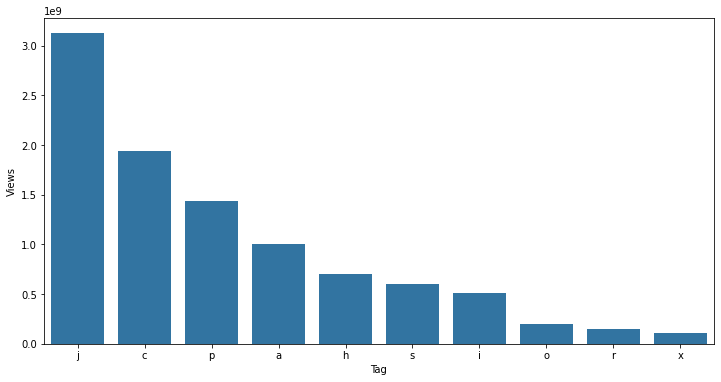

In [12]:
sns.barplot(tag_views)
plt.show()

<Axes: >

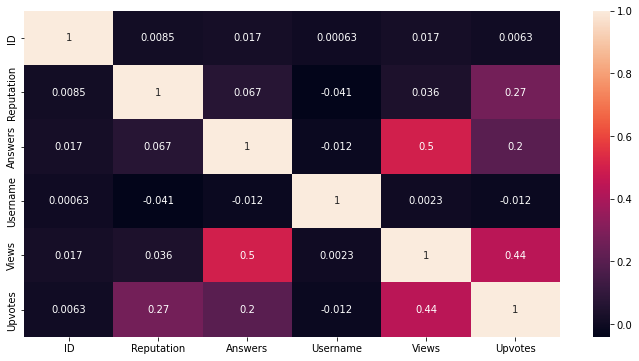

In [94]:
sns.heatmap(df.corr(), annot=True)

1. views and upvote has good corrlation 
2. views and number of answers as good corrlation.

**which tag has highest upvote count?**

In [13]:
tag_upvotes = df.groupby("Tag")['Upvotes'].sum().sort_values(ascending = False)
tag_upvotes

Tag
j    39031622.0
c    23735061.0
p    17681927.0
a    10030204.0
h     7911376.0
s     5528283.0
i     3803327.0
o     1631440.0
x     1055459.0
r      983257.0
Name: Upvotes, dtype: float64

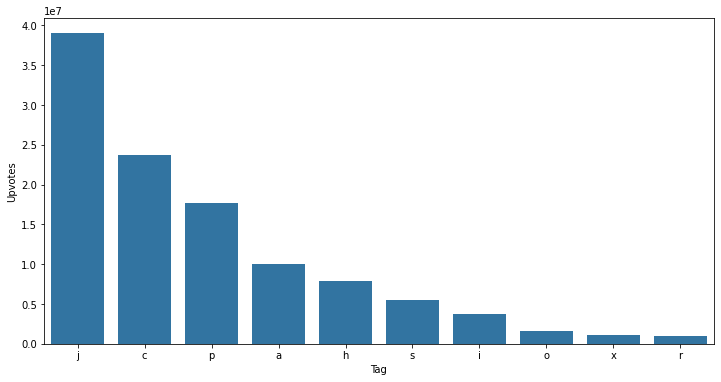

In [15]:
sns.barplot(tag_upvotes)
plt.show()

Based on the Tag the upvotes are incrasing.

**which tag has highest average upvote count?**

In [16]:
tag_avg_upvotes = df.groupby("Tag")['Upvotes'].mean().sort_values(ascending = False)
tag_avg_upvotes

Tag
j    540.364686
p    407.351971
h    384.719704
c    327.569916
a    316.460136
s    237.031385
x    151.255231
i    117.386636
o    112.157294
r     79.027246
Name: Upvotes, dtype: float64

In [17]:
list(tag_avg_upvotes.index[::-1])

['r', 'o', 'i', 'x', 's', 'a', 'c', 'h', 'p', 'j']

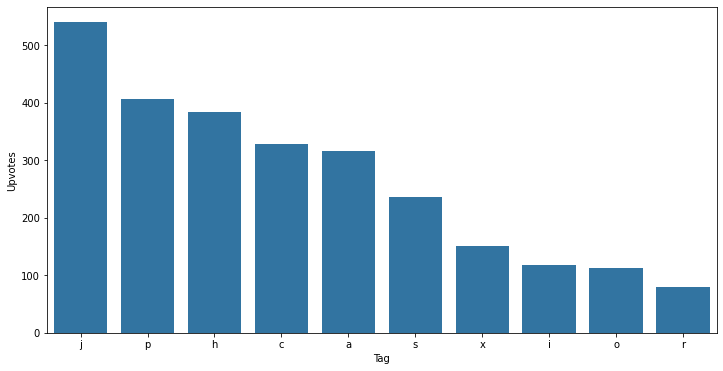

In [19]:
sns.barplot(tag_avg_upvotes)
plt.show()

Since we have imbalance counts between the Tag in our data, taking the mean for each tag is reliable.

**Analysing user frequency**

In [28]:
user_frquen = df['Username'].value_counts()
user_frquen

4118      797
17878     608
45704     483
23223     413
62142     408
         ... 
122593      1
110208      1
137797      1
17286       1
80245       1
Name: Username, Length: 141802, dtype: int64

In [29]:
df['user_freq'] = df['Username'].apply(lambda x:user_frquen[x])

In [30]:
df.head(20)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,user_freq
0,52664,a,3942.0,2.0,155623,7855.0,42.0,19
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,2
2,468453,c,1358.0,4.0,56177,8067.0,60.0,1
3,96996,a,264.0,3.0,168793,27064.0,9.0,3
4,131465,c,4271.0,4.0,112223,13986.0,83.0,3
5,345568,r,440.0,1.0,23866,5577.0,4.0,7
6,376865,c,147.0,1.0,10759,17184.0,17.0,3
7,467378,j,2269.0,2.0,54623,312.0,3.0,7
8,393640,j,111.0,2.0,172926,53738.0,79.0,1
9,130054,c,2749.0,1.0,10189,227.0,0.0,6


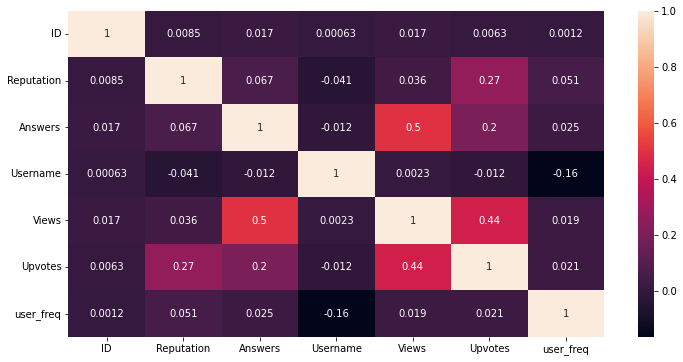

In [31]:
sns.heatmap(df.corr(), annot=True)
plt.show()

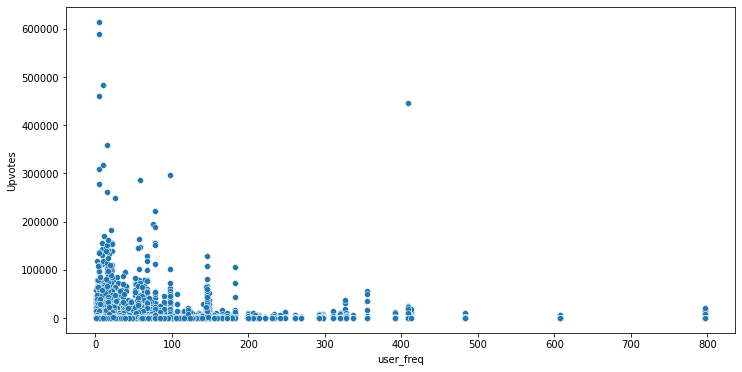

In [33]:
sns.scatterplot(df, x='user_freq', y='Upvotes')
plt.show()

In [ ]:
sns.histplot(df2)

## Encoding Tag Variable

From the above analysis we get that the Tag catagory has a impact on number of upvotes. So we do the Ordinal encoding.

In [34]:
df1 = df.copy()

In [35]:
from sklearn.preprocessing import OrdinalEncoder

In [36]:
ordinal_encode = OrdinalEncoder(categories=list([tag_avg_upvotes.index[::-1]]))

In [37]:
df1['Tag_encoded'] = ordinal_encode.fit_transform(df[['Tag']])

In [38]:
df1.head(20)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,user_freq,Tag_encoded
0,52664,a,3942.0,2.0,155623,7855.0,42.0,19,5.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,2,5.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0,1,6.0
3,96996,a,264.0,3.0,168793,27064.0,9.0,3,5.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0,3,6.0
5,345568,r,440.0,1.0,23866,5577.0,4.0,7,0.0
6,376865,c,147.0,1.0,10759,17184.0,17.0,3,6.0
7,467378,j,2269.0,2.0,54623,312.0,3.0,7,9.0
8,393640,j,111.0,2.0,172926,53738.0,79.0,1,9.0
9,130054,c,2749.0,1.0,10189,227.0,0.0,6,6.0


In [39]:
df2 = df1.drop(['ID','Tag','Username'], axis=1)

In [40]:
df2.head()

,Reputation,Answers,Views,Upvotes,user_freq,Tag_encoded
0,3942.0,2.0,7855.0,42.0,19,5.0
1,26046.0,12.0,55801.0,1175.0,2,5.0
2,1358.0,4.0,8067.0,60.0,1,6.0
3,264.0,3.0,27064.0,9.0,3,5.0
4,4271.0,4.0,13986.0,83.0,3,6.0


<Axes: >

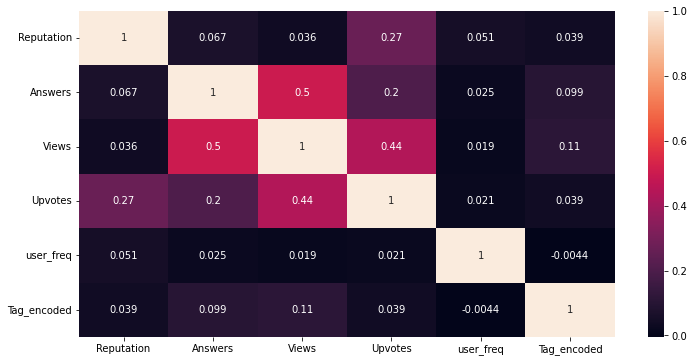

In [106]:
sns.heatmap(df2.corr(), annot=True)

# Model Building

In [77]:
from statsmodels.api import OLS, add_constant
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [157]:
metric = {
    "model":[],
    "R^2":[],
    "RMSE":[]
}

In [158]:
def append_metric(model_name, r_2, rmse):
    metric['model'].append(model_name)
    metric['R^2'].append(r_2)
    metric['RMSE'].append(rmse)

In [78]:
x = df2.drop('Upvotes', axis=1)
y = df2['Upvotes']
xc = add_constant(x)

In [79]:
xtrain, xtest, ytrain, ytest = train_test_split(xc, y, train_size=0.8, random_state=100)

In [80]:
xtrain.shape

(264036, 6)

In [81]:
ytrain.shape

(264036,)

In [82]:
OLS_model1 = OLS(ytrain, xtrain).fit()

In [83]:
OLS_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Upvotes   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                 1.725e+04
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:06:05   Log-Likelihood:            -2.5107e+06
No. Observations:              264036   AIC:                         5.021e+06
Df Residuals:                  264030   BIC:                         5.021e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -237.2756     16.543    -14.343      0.000    -269.699    -204.852
Reputation      0.0349      0.000    148.627      0.000       0.034       0.035
Answers       -39.1923      2.060    -19.025      0.000     -43.230     -35.155
Views           0.0203   9.06e-05    224.150      0.000       0.020       0.020
user_freq      -0.0007      0.091     -0.008      0.994      -0.178       0.177
Tag_encoded   -24.5857      2.395    -10.266      0.000     -29.279     -19.892
==============================================================================
Omnibus:                   988481.310   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1345890897532.432
Skew:                          83.157   Prob(JB):                         0.00
Kurtosis:                   11062.357   Cond. No.                     2.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**from the above summary we can see that the user_freq has p-value > 0.05.**

<Axes: xlabel='None'>

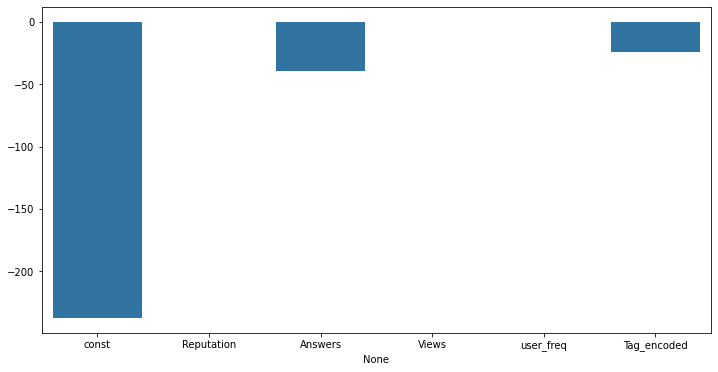

In [84]:
sns.barplot(x=OLS_model1.params.index, y=OLS_model1.params.values)

**From the above plot we can see that Reputation, views and user_freq contribution in very less to the model.**

**So lets drop user frequency**

In [85]:
x = x.drop('user_freq', axis=1)
xc = add_constant(x)

In [86]:
xtrain, xtest, ytrain, ytest = train_test_split(xc, y, train_size=0.8, random_state=100)

In [87]:
OLS_model1 = OLS(ytrain, xtrain).fit()

In [88]:
OLS_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Upvotes   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                 2.156e+04
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:06:06   Log-Likelihood:            -2.5107e+06
No. Observations:              264036   AIC:                         5.021e+06
Df Residuals:                  264031   BIC:                         5.021e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -237.2897     16.438    -14.435      0.000    -269.509    -205.071
Reputation      0.0349      0.000    148.801      0.000       0.034       0.035
Answers       -39.1926      2.060    -19.027      0.000     -43.230     -35.155
Views           0.0203   9.06e-05    224.156      0.000       0.020       0.020
Tag_encoded   -24.5855      2.395    -10.267      0.000     -29.279     -19.892
==============================================================================
Omnibus:                   988481.376   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1345891686767.648
Skew:                          83.157   Prob(JB):                         0.00
Kurtosis:                   11062.360   Cond. No.                     2.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
y_pred_test =OLS_model1.predict(xtest)

In [145]:
np.sqrt(mean_squared_error(ytest, y_pred_test))

2345.8411211838456

In [146]:
r2_score(ytest, y_pred_test)

0.3194845557728435

In [159]:
append_metric("OLS_Model",r2_score(ytest, y_pred_test), np.sqrt(mean_squared_error(ytest, y_pred_test)))

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [94]:
calc_vif(xtrain)

,variables,VIF
0,const,6.708221
1,Reputation,1.005755
2,Answers,1.341492
3,Views,1.340946
4,Tag_encoded,1.016622


In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8, random_state=100)

In [97]:
model2 = LinearRegression()
model2.fit(xtrain, ytrain)

LinearRegression()

In [98]:
ytest_pred2 = model2.predict(xtest)

In [99]:
model2.score(xtrain, ytrain)

0.2462446632724825

In [100]:
model2.score(xtest, ytest)

0.31948455577286405

In [101]:
rmse1 = np.sqrt(mean_squared_error(ytest,ytest_pred2))

In [102]:
print(f"RMSE for Linear regression: {rmse1}")

RMSE for Linear regression: 2345.84112118381


In [160]:
append_metric("Linear Regression", model2.score(xtest, ytest), rmse1)

## polinomial Model

In [103]:
from sklearn.preprocessing import PolynomialFeatures

### 2 order polynomial

In [104]:
poly_tranform1 = PolynomialFeatures(degree=2)

In [105]:
xtrain_trans = poly_tranform1.fit_transform(xtrain)
xtest_trans = poly_tranform1.fit_transform(xtest)

In [106]:
model3 = LinearRegression()
model3.fit(xtrain_trans, ytrain)

LinearRegression()

In [107]:
model3.score(xtrain_trans, ytrain)

0.9032118160082976

In [108]:
model3.score(xtest_trans, ytest)

0.9207686794311781

In [109]:
y_test_pred_model3 = model3.predict(xtest_trans)

In [110]:
model3.coef_

array([ 0.00000000e+00,  5.16707161e-03,  6.13383546e+00, -5.91665926e-04,
        8.40423469e-01, -3.54665265e-09, -2.48007692e-04,  9.60380436e-07,
       -2.42098317e-04,  1.99568487e-01, -5.91492816e-05,  4.32182364e-01,
        1.43125392e-09,  1.66836758e-04, -3.63543236e-01])

In [111]:
model3.intercept_

-17.331755549231445

In [112]:
mean_squared_error(ytest, y_test_pred_model3)

640702.0276781395

In [113]:
rmse2 = np.sqrt(mean_squared_error(ytest, y_test_pred_model3))

In [114]:
print(f"RMSE for 2 order polinomial model: {rmse2}")

RMSE for 2 order polinomial model: 800.4386470418201


In [161]:
append_metric("Polinomial_model_2nd_order", model3.score(xtest_trans, ytest), rmse2)

### 3rd order Ploinomial model

In [115]:
poly_tranform2 = PolynomialFeatures(degree=3)

In [116]:
xtrain_trans2 = poly_tranform2.fit_transform(xtrain)
xtest_trans2 = poly_tranform2.fit_transform(xtest)

In [118]:
model3_2 = LinearRegression()
model3_2.fit(xtrain_trans2, ytrain)

LinearRegression()

In [119]:
model3_2.score(xtrain_trans2, ytrain)

0.9186378891078734

In [120]:
model3_2.score(xtest_trans2, ytest)

0.9200922988307569

In [121]:
y_test_pred_model3_2 = model3_2.predict(xtest_trans2)

In [122]:
mean_squared_error(ytest, y_test_pred_model3_2)

646171.5619363191

In [123]:
rmse3 = np.sqrt(mean_squared_error(ytest, y_test_pred_model3_2))

In [124]:
print(f"RMSE for 3 order polinomial model: {rmse3}")

RMSE for 3 order polinomial model: 803.8479719053342


In [162]:
append_metric("Polinomial_model_3rd_order", model3_2.score(xtest_trans2, ytest), rmse3)

**The 2nd order polynomial model is better.**

## Tree based Model

In [125]:
from sklearn.tree import DecisionTreeRegressor

**Decission Tree model**

In [126]:
decission_tree_1 = DecisionTreeRegressor()

In [127]:
decission_tree_1.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [128]:
y_pred_decission1 = decission_tree_1.predict(xtest)

***R^2 value***

In [129]:
decission_tree_1.score(xtest, ytest)

0.8363624556765212

**RMSE**

In [130]:
np.sqrt(mean_squared_error(ytest, y_pred_decission1))

1150.326378176969

In [163]:
append_metric("DecisionTree", decission_tree_1.score(xtest, ytest), np.sqrt(mean_squared_error(ytest, y_pred_decission1)))

In [131]:
decission_tree_1.feature_importances_

array([0.6719919 , 0.00960806, 0.29396014, 0.02443989])

In [132]:
xtrain.columns

Index(['Reputation', 'Answers', 'Views', 'Tag_encoded'], dtype='object')

sns.barplot(x=xtrain.columns, y=decission_tree_1.feature_importances_)

**Random Forest Model**

In [135]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
random_forest_model = RandomForestRegressor()

In [139]:
random_forest_model.fit(xtrain, ytrain)

RandomForestRegressor()

In [140]:
y_pred_randome_for = random_forest_model.predict(xtest)

**R^2**

In [141]:
random_forest_model.score(xtest, ytest)

0.8933927447254361

**RMSE**

In [142]:
np.sqrt(mean_squared_error(ytest, y_pred_randome_for))

928.4809188717464

In [164]:
append_metric("Random Forest", random_forest_model.score(xtest, ytest), np.sqrt(mean_squared_error(ytest, y_pred_randome_for)))

In [165]:
df_metric = pd.DataFrame(metric)
df_metric

,model,R^2,RMSE
0,OLS_Model,0.319485,2345.841121
1,Linear Regression,0.319485,2345.841121
2,Polinomial_model_2nd_order,0.920769,800.438647
3,Polinomial_model_3rd_order,0.920092,803.847972
4,DecisionTree,0.836362,1150.326378
5,Random Forest,0.893393,928.480919


In [166]:
df_metric.sort_values(by='RMSE')

,model,R^2,RMSE
2,Polinomial_model_2nd_order,0.920769,800.438647
3,Polinomial_model_3rd_order,0.920092,803.847972
5,Random Forest,0.893393,928.480919
4,DecisionTree,0.836362,1150.326378
1,Linear Regression,0.319485,2345.841121
0,OLS_Model,0.319485,2345.841121


From the above table we can see that  2nd order Polinomial model peformed better than all other model.